## Compare sequence logos for attribution methods for ResidualBind model with relu and exponential activations trained on IRF1 ChIP-seq data


Figures generated from this notebook include:
- Fig. 3c
- Supplementary Fig. 14

In [1]:
import os
import numpy as np
from six.moves import cPickle
import matplotlib.pyplot as plt
import logomaker
import pandas as pd
from tensorflow import keras

import helper
from tfomics import utils, metrics, explain

Using TensorFlow backend.


In [2]:

model_names = ['residual_bind'] 
activations = ['relu', 'exponential']#

results_path = os.path.join('../results', 'task6')
params_path = os.path.join(results_path, 'model_params')
plot_path = utils.make_directory(results_path, 'attr_plots')


making directory: ../results/task6/attr_plots


In [3]:
file_path = '../data/IRF1_400_h3k27ac.h5' 
data = helper.load_data(file_path, reverse_compliment=True)
x_train, y_train, x_valid, y_valid, x_test, y_test = data

true_index = np.where(y_test[:,0] == 1)[0]
X = x_test[true_index][:500]

In [4]:
# load saliency results
file_path = os.path.join(results_path, 'task6_saliency_results.pickle')
with open(file_path, 'rb') as f:
    results = cPickle.load(f)
    
scores = results['residualbind_exponential_irf1']
scores2 = results['residualbind_relu_irf1']
scores *= X
scores2 *= X

plot_range = range(50,350)
scores = scores[:,plot_range,:]
scores2 = scores2[:,plot_range,:]

X = X[:,plot_range,:]
N, L, A = scores.shape

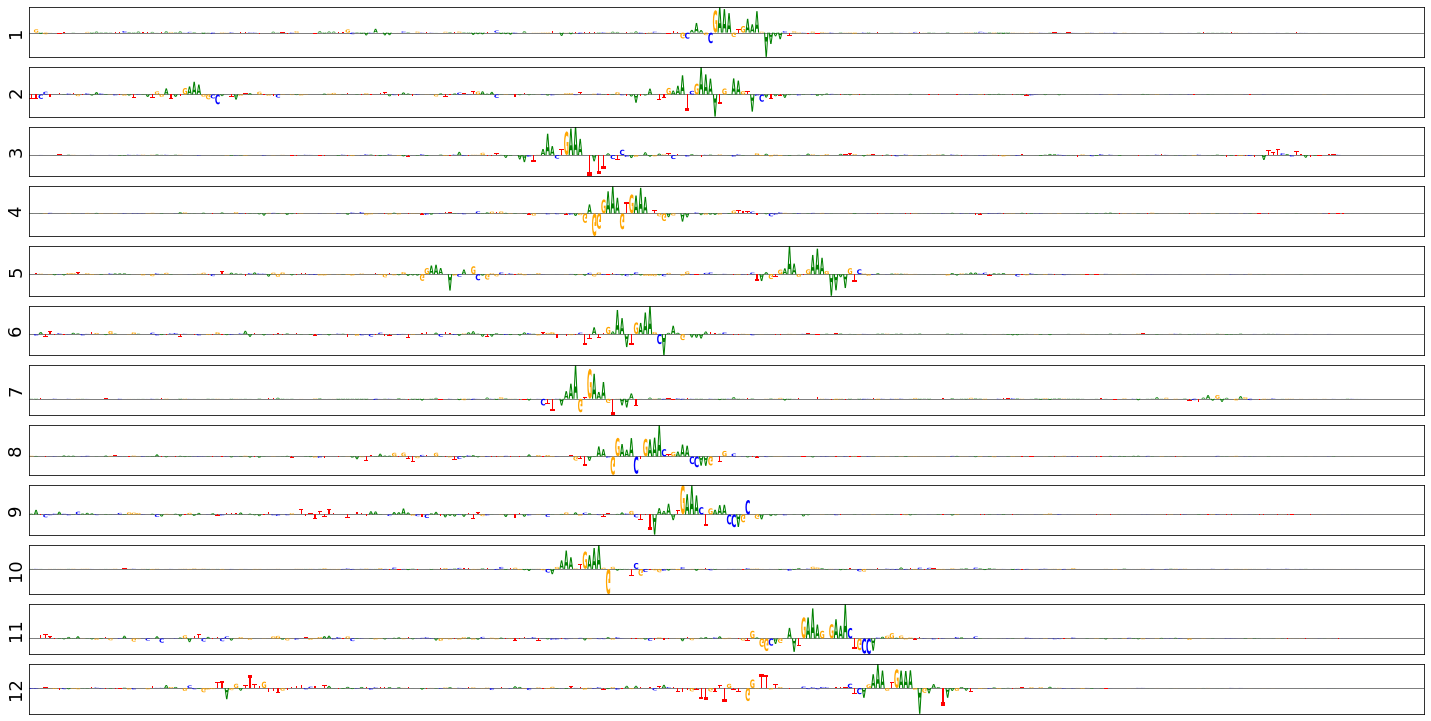

In [5]:
plot_index = [5, 12, 40, 45, 46, 52, 56, 58, 73, 93, 95, 98]


fig = plt.figure(figsize=(25,13))
for i in range(len(plot_index)):
    

    counts_df = pd.DataFrame(data=0.0, columns=list('ACGT'), index=list(range(L)))
    for a in range(A):
        for l in range(L):
            counts_df.iloc[l,a] = scores2[plot_index[i],l,a]

    ax = plt.subplot(len(plot_index),1,i+1)
    logomaker.Logo(counts_df, ax=ax)
    ax.yaxis.set_ticks_position('none')
    ax.xaxis.set_ticks_position('none')
    plt.xticks([])
    plt.yticks([])
    fig = plt.gcf()
    plt.ylabel(i+1, fontsize=18)
    #plt.ylabel('Relu', fontsize=16)
    #ax2 = ax.twinx()
    #plt.ylabel(np.round(pr_score[k],4), fontsize=16)
    #plt.yticks([])
    
outfile = os.path.join(plot_path, 'Relu_residualbind_irf1.pdf')
fig.savefig(outfile, format='pdf', dpi=200, bbox_inches='tight')


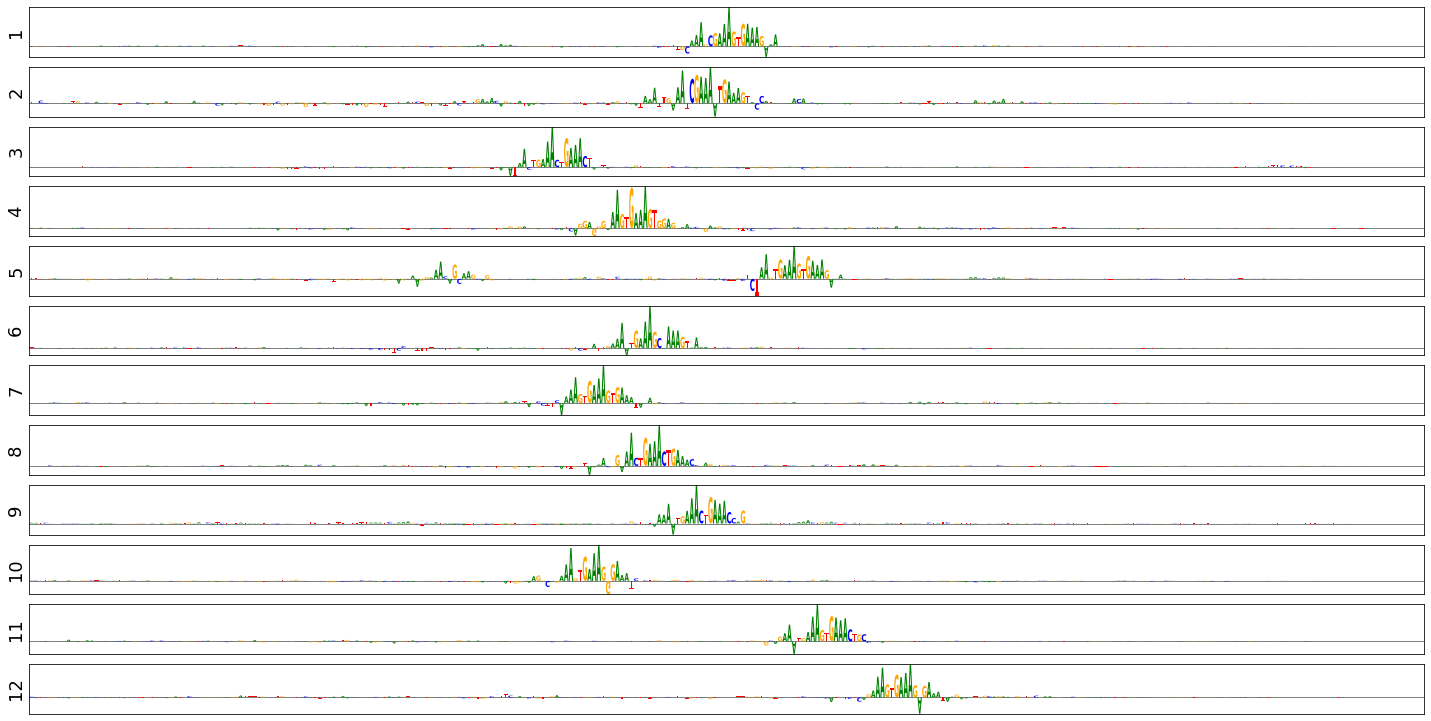

In [6]:
plot_index = [5, 12, 40, 45, 46, 52, 56, 58, 73, 93, 95, 98]

fig = plt.figure(figsize=(25,13))
for i in range(len(plot_index)):
    
    counts_df = pd.DataFrame(data=0.0, columns=list('ACGT'), index=list(range(L)))
    for a in range(A):
        for l in range(L):
            counts_df.iloc[l,a] = scores[plot_index[i],l,a]

    ax = plt.subplot(len(plot_index),1,i+1)
    logomaker.Logo(counts_df, ax=ax)
    ax.yaxis.set_ticks_position('none')
    ax.xaxis.set_ticks_position('none')
    plt.xticks([])
    plt.yticks([])
    fig = plt.gcf()
    plt.ylabel(i+1, fontsize=18)
    #plt.ylabel('Relu', fontsize=16)
    #ax2 = ax.twinx()
    #plt.ylabel(np.round(pr_score[k],4), fontsize=16)
    #plt.yticks([])
    
outfile = os.path.join(plot_path, 'Exp_residualbind_irf1.pdf')
fig.savefig(outfile, format='pdf', dpi=200, bbox_inches='tight')
